<h1 style="color:blue;">Data Science with Python</h1>

<h2 style="color:Gray;">Task 2</h2>

In [4]:
#Importar librerías
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
#Importar datos
credit = pd.read_csv('default of credit card clients.csv', header =1)
print(credit)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

<h2 style="color:Gray;">------Inicio Inspección y preparación de datos------</h2>

In [6]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
#Se validan nombres de las columnas
header = credit.dtypes.index
print(header)

#Se actualiza nombre de columna
credit = credit.rename(columns={'default payment next month': 'default_payment_next_month'})
credit = credit.rename(columns={'PAY_0': 'PAY_1'})



Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

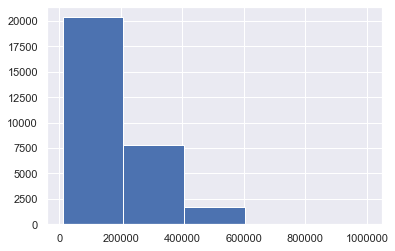

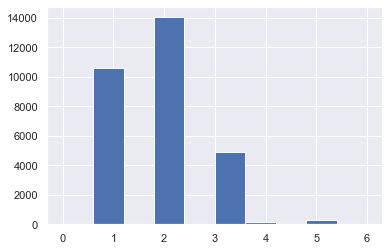

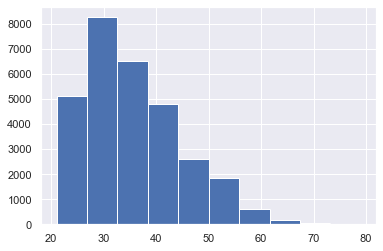

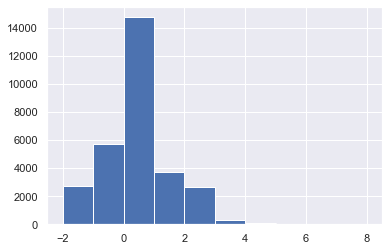

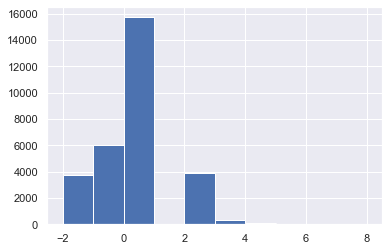

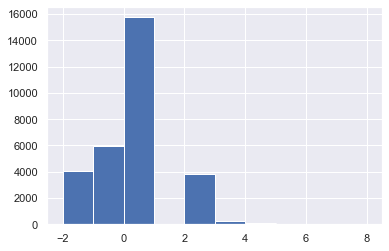

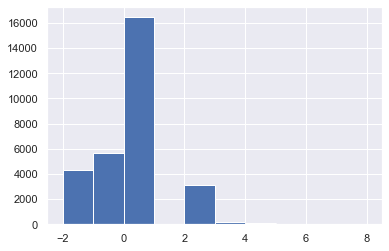

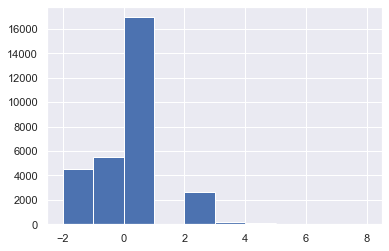

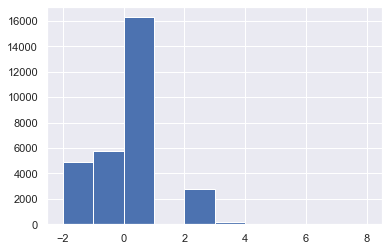

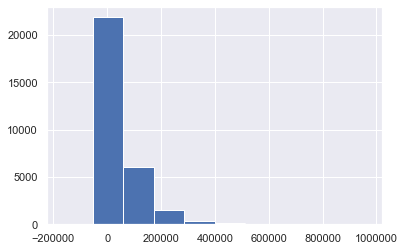

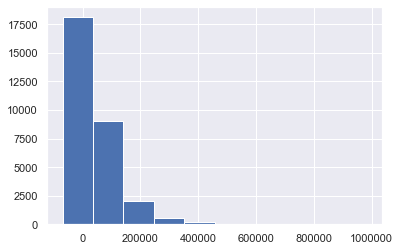

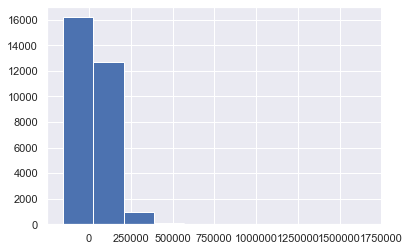

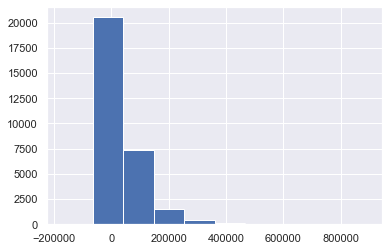

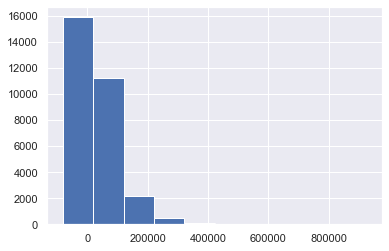

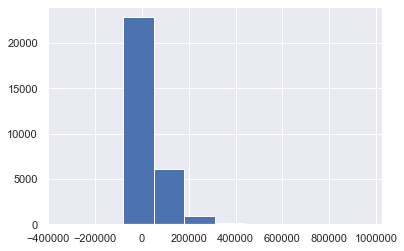

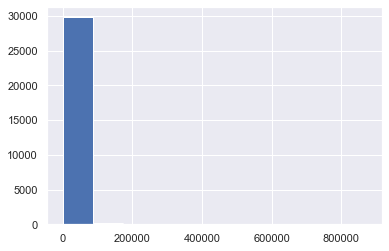

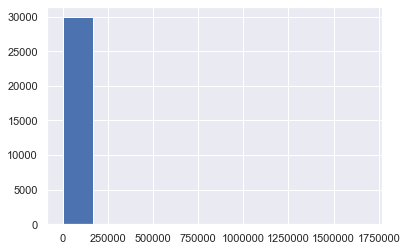

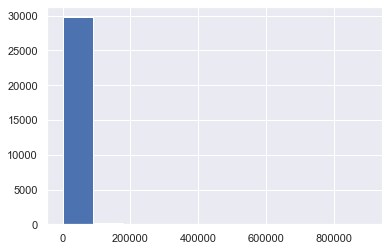

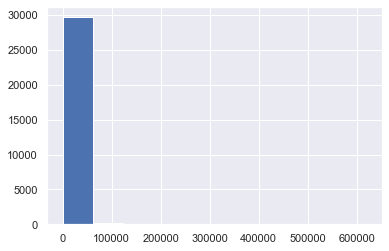

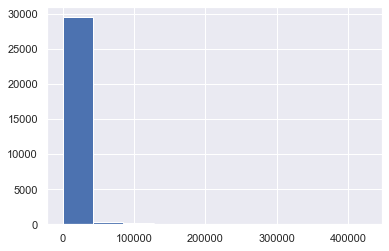

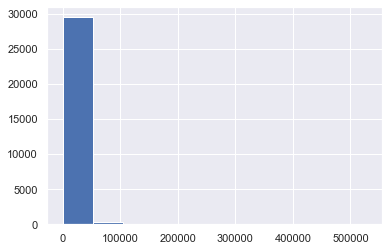

In [10]:
#Histogram Plot
plt.hist(credit['LIMIT_BAL'], bins=5)
plt.show()

plt.hist(credit['EDUCATION'])
plt.show()

plt.hist(credit['AGE'])
plt.show()

plt.hist(credit['PAY_1'])
plt.show()

plt.hist(credit['PAY_2'])
plt.show()

plt.hist(credit['PAY_3'])
plt.show()

plt.hist(credit['PAY_4'])
plt.show()

plt.hist(credit['PAY_5'])
plt.show()

plt.hist(credit['PAY_6'])
plt.show()

plt.hist(credit['BILL_AMT1'])
plt.show()

plt.hist(credit['BILL_AMT2'])
plt.show()

plt.hist(credit['BILL_AMT3'])
plt.show()

plt.hist(credit['BILL_AMT4'])
plt.show()

plt.hist(credit['BILL_AMT5'])
plt.show()

plt.hist(credit['BILL_AMT6'])
plt.show()

plt.hist(credit['PAY_AMT1'])
plt.show()

plt.hist(credit['PAY_AMT2'])
plt.show()

plt.hist(credit['PAY_AMT3'])
plt.show()

plt.hist(credit['PAY_AMT4'])
plt.show()

plt.hist(credit['PAY_AMT5'])
plt.show()

plt.hist(credit['PAY_AMT6'])
plt.show()




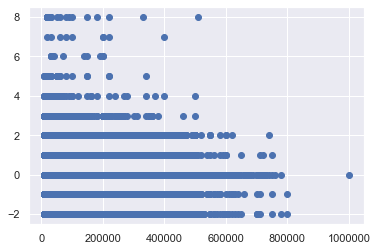

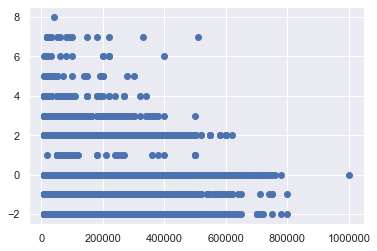

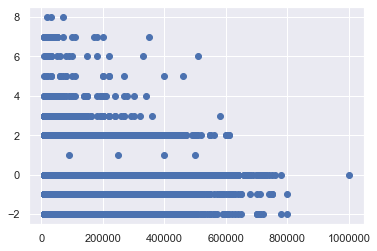

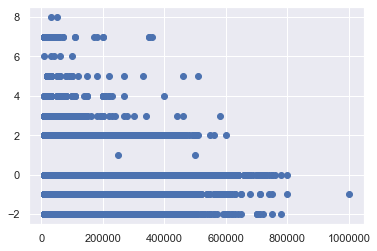

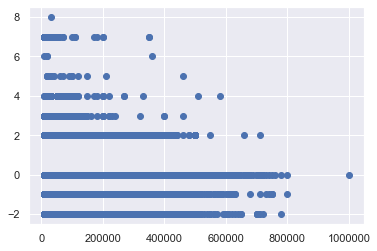

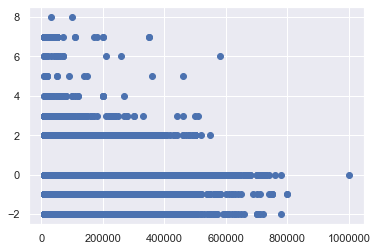

Distribución limit_bal por Género


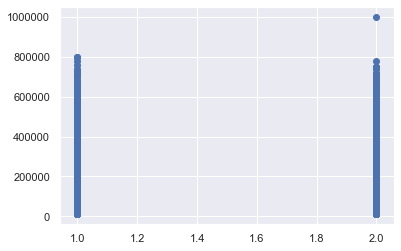

Distribución limit_bal por Educación


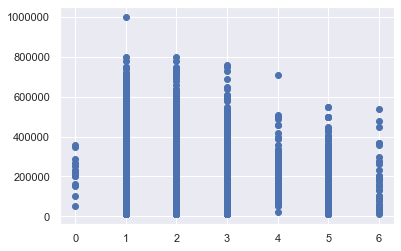

Distribución limit_bal por Estado Civil


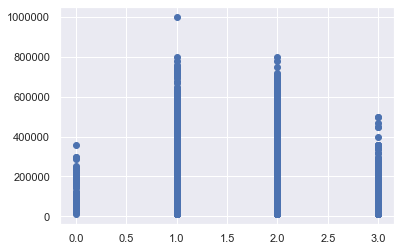

In [12]:
#Scatter Plot
#-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay
#for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight
#months; 9 = payment delay for nine months and above

#Distribución de pagos
x = credit['LIMIT_BAL']
y = credit['PAY_1']
plt.scatter(x,y)
plt.show()

#Scatter Plot
g = credit['LIMIT_BAL']
h = credit['PAY_2']
plt.scatter(g,h)
plt.show()

#Scatter Plot
i = credit['LIMIT_BAL']
j = credit['PAY_3']
plt.scatter(i,j)
plt.show()

#Scatter Plot
k = credit['LIMIT_BAL']
l = credit['PAY_4']
plt.scatter(k,l)
plt.show()

#Scatter Plot
m = credit['LIMIT_BAL']
n = credit['PAY_5']
plt.scatter(m,n)
plt.show()


#Scatter Plot
o = credit['LIMIT_BAL']
p = credit['PAY_6']
plt.scatter(o,p)
plt.show()

#Scatter Plot= distribuci
print('Distribución limit_bal por Género')
a = credit['SEX']
b = credit['LIMIT_BAL']
plt.scatter(a,b)
plt.show()

#Scatter Plot
print('Distribución limit_bal por Educación')
c = credit['EDUCATION']
d = credit['LIMIT_BAL']
plt.scatter(c,d)
plt.show()


#Scatter Plot
print('Distribución limit_bal por Estado Civil')
e = credit['MARRIAGE']
f = credit['LIMIT_BAL']
plt.scatter(e,f)
plt.show()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')


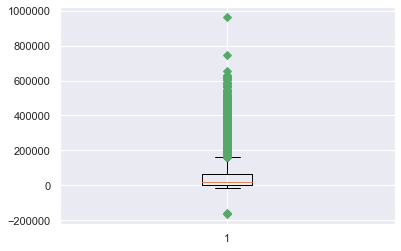

In [14]:
#Box Plot
header = credit.dtypes.index
print(header)

A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

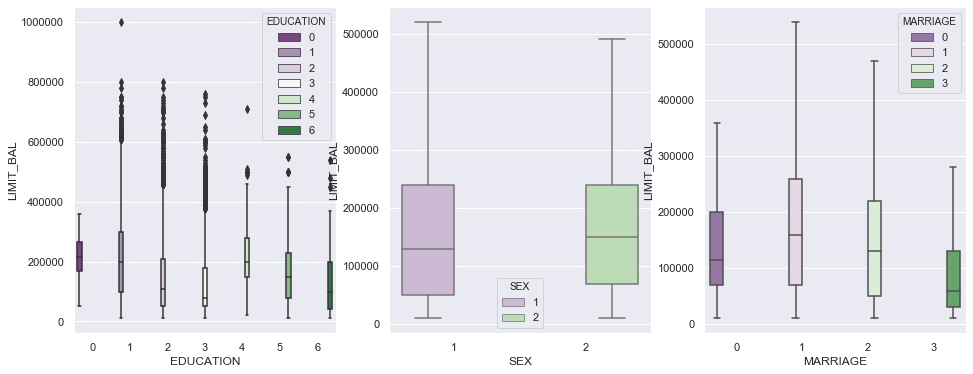

In [181]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,6))
s = sns.boxplot(ax = ax1, x="EDUCATION", y="LIMIT_BAL", hue="EDUCATION",data=credit, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit, palette="PRGn",showfliers=False)
s = sns.boxplot(ax = ax3, x="MARRIAGE", y="LIMIT_BAL", hue="MARRIAGE",data=credit, palette="PRGn",showfliers=False)
plt.show();

In [15]:
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [16]:
covMat = credit.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

In [17]:
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [18]:
covMat = credit.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

[25 rows x 25 columns]


<h3 style="color:Gray;">Inicio: Distintas formas para identificar valores nulos</h3>

In [110]:
credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [21]:
#credit.isna().sum
np.isnan(credit.values).sum()

0

In [22]:
for column in credit:
    if credit[column].isnull().values.any():
        print (column +'='+'Sí tiene nulos')
    else:
        print (column +'='+'No tiene nulos')

ID=No tiene nulos
LIMIT_BAL=No tiene nulos
SEX=No tiene nulos
EDUCATION=No tiene nulos
MARRIAGE=No tiene nulos
AGE=No tiene nulos
PAY_0=No tiene nulos
PAY_2=No tiene nulos
PAY_3=No tiene nulos
PAY_4=No tiene nulos
PAY_5=No tiene nulos
PAY_6=No tiene nulos
BILL_AMT1=No tiene nulos
BILL_AMT2=No tiene nulos
BILL_AMT3=No tiene nulos
BILL_AMT4=No tiene nulos
BILL_AMT5=No tiene nulos
BILL_AMT6=No tiene nulos
PAY_AMT1=No tiene nulos
PAY_AMT2=No tiene nulos
PAY_AMT3=No tiene nulos
PAY_AMT4=No tiene nulos
PAY_AMT5=No tiene nulos
PAY_AMT6=No tiene nulos
default_payment_next_month=No tiene nulos


<h3 style="color:Gray;">Fin: Distintas formas para identificar valores nulos</h3>

<h3 style="color:Gray;">Inicio: Gráficos</h3>

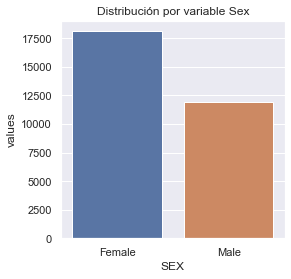

1= Male, 2= Female
Distribución en cantidad
2    18112
1    11888
Name: SEX, dtype: int64
Distribución en porcentaje
2    60.373333
1    39.626667
Name: SEX, dtype: float64


In [13]:
#Gráfico distribución SEX
#1=male, 2=female

qSex = credit['SEX'].value_counts()
plotSex = pd.DataFrame({'SEX': ['Female', 'Male'],'values': qSex.values})
plt.figure(figsize = (4,4))
plt.title('Distribución por variable Sex')
sns.barplot(x = 'SEX', y='values', data=plotSex)
plt.show()

cplotSex = credit['SEX'].value_counts()
print('1= Male, 2= Female')
print('Distribución en cantidad')
print(cplotSex)
print('Distribución en porcentaje')
cplotSexPorcentage = credit['SEX'].value_counts('1')*100
print(cplotSexPorcentage)


1= Male, 2= Female
Distribución en cantidad
2    18112
1    11888
Name: SEX, dtype: int64
Distribución en porcentaje
2    60.373333
1    39.626667
Name: SEX, dtype: float64


SEX,1,2,All
default_payment_next_month,,,
0,9007,14343,23350
1,2873,3763,6636
All,11880,18106,29986


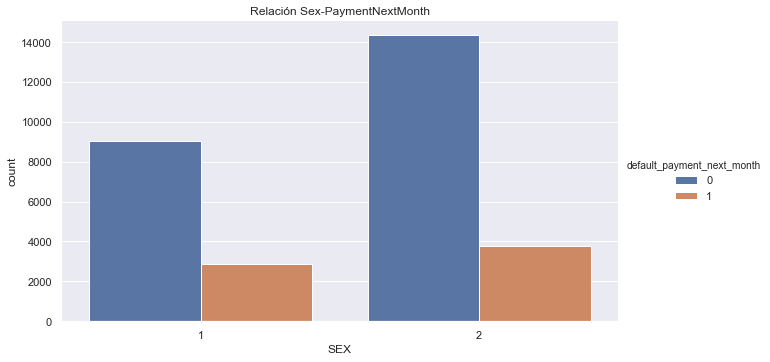

In [144]:
#Relación Sec PaymentNextMonth
#0= Not default 1=Default
#1=male, 2=female

g = sns.catplot('SEX', data=credit, hue='default_payment_next_month', kind='count', aspect=1.75)
g.set_xlabels('SEX')
g.set(title= 'Relación Sex-PaymentNextMonth')

cplotSex = credit['SEX'].value_counts()
print('1= Male, 2= Female')
print('Distribución en cantidad')
print(cplotSex)
print('Distribución en porcentaje')
cplotSexPorcentage = credit['SEX'].value_counts('1')*100
print(cplotSexPorcentage)

credit.pivot_table( 'EDUCATION','default_payment_next_month','SEX', aggfunc=np.count_nonzero, margins=True)


1 = married; 2 = single; 3 = divorce; 0=others
Distribución en cantidad
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
Distribución en porcentaje
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64


MARRIAGE,0,1,2,3,All
default_payment_next_month,,,,,
0,49,10449,12613,239,23350
1,5,3206,3341,84,6636
All,54,13655,15954,323,29986


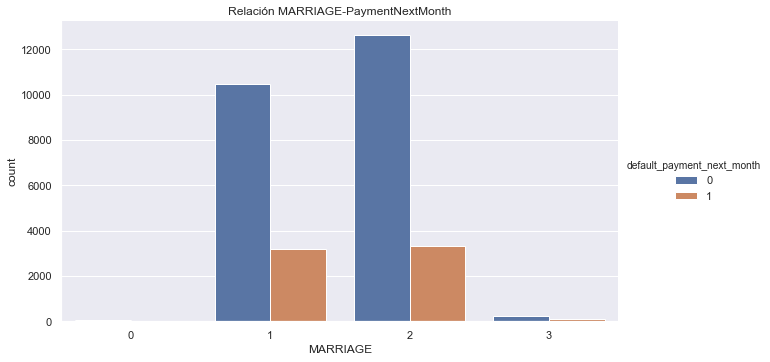

In [187]:
#1 = married; 2 = single; 3 = divorce; 0=others.
g = sns.catplot('MARRIAGE', data=credit, hue='default_payment_next_month', kind='count', aspect=1.75)
g.set_xlabels('MARRIAGE')
g.set(title= 'Relación MARRIAGE-PaymentNextMonth')

cplotSex = credit['MARRIAGE'].value_counts()
print('1 = married; 2 = single; 3 = divorce; 0=others')
print('Distribución en cantidad')
print(cplotSex)
print('Distribución en porcentaje')
cplotSexPorcentage = credit['MARRIAGE'].value_counts('1')*100
print(cplotSexPorcentage)

credit.pivot_table( 'EDUCATION','default_payment_next_month','MARRIAGE', aggfunc=np.count_nonzero, margins=True)

1= Male, 2= Female
Distribución en cantidad
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
Distribución en porcentaje
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64


EDUCATION,0,1,2,3,4,5,6,All
default_payment_next_month,,,,,,,,
0,217142.857143,221224.704644,157790.280374,136138.586957,225517.241379,170595.419847,154186.046512,178099.726074
1,NaN,178236.738703,112591.591592,98025.610348,144285.714286,132777.777778,116250.000000,130109.656420
All,217142.857143,212956.069910,147062.437634,126550.270490,220894.308943,168164.285714,148235.294118,167484.322667


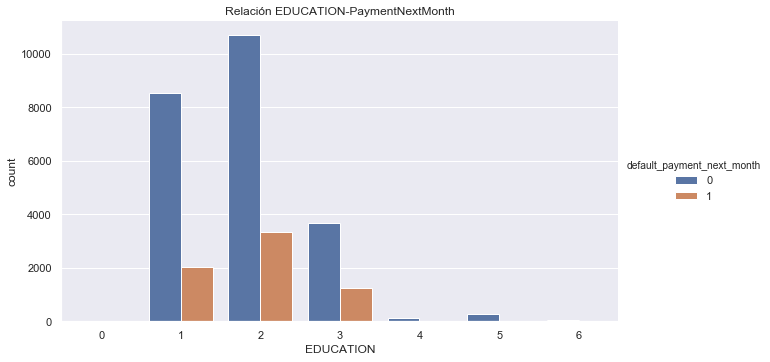

In [158]:
#Relación Education Sex
#g = sns.catplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)
#g.set_xlabels('EDUCATION')


g = sns.catplot('EDUCATION', data=credit, hue='default_payment_next_month', kind='count', aspect=1.75)
g.set_xlabels('EDUCATION')
g.set(title= 'Relación EDUCATION-PaymentNextMonth')

cplotSex = credit['EDUCATION'].value_counts()
print('1= Male, 2= Female')
print('Distribución en cantidad')
print(cplotSex)
print('Distribución en porcentaje')
cplotSexPorcentage = credit['EDUCATION'].value_counts('1')*100
print(cplotSexPorcentage)

credit.pivot_table( 'SEX','default_payment_next_month','EDUCATION', aggfunc=np.count_nonzero, margins=True)

credit.pivot_table( 'LIMIT_BAL','default_payment_next_month','SEX', aggfunc=np.sum, margins=True)

credit.pivot_table( 'LIMIT_BAL','default_payment_next_month','EDUCATION', aggfunc=np.mean, margins=True)

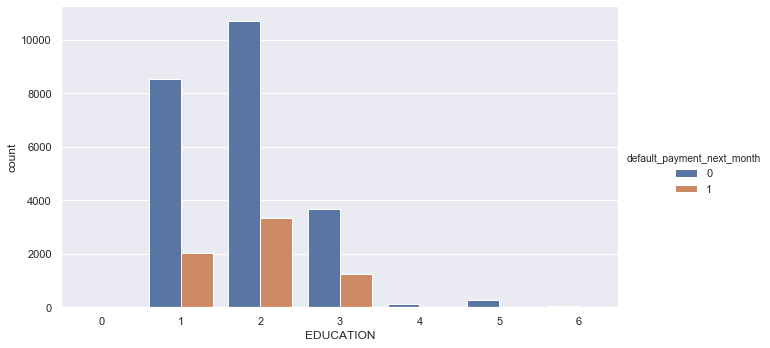

In [25]:
#Relación Education PaymentNextMonth
#0= Not default 1=Default
g = sns.catplot('EDUCATION', data=credit, hue='default_payment_next_month', kind='count', aspect=1.75)
g.set_xlabels('EDUCATION')

In [26]:
#1= male 2= female
credit.pivot_table('default_payment_next_month', 'SEX','EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,0,906,1408,545,4,6,4,2873
2,0,1130,1922,692,3,12,4,3763
All,0,2036,3330,1237,7,18,8,6636


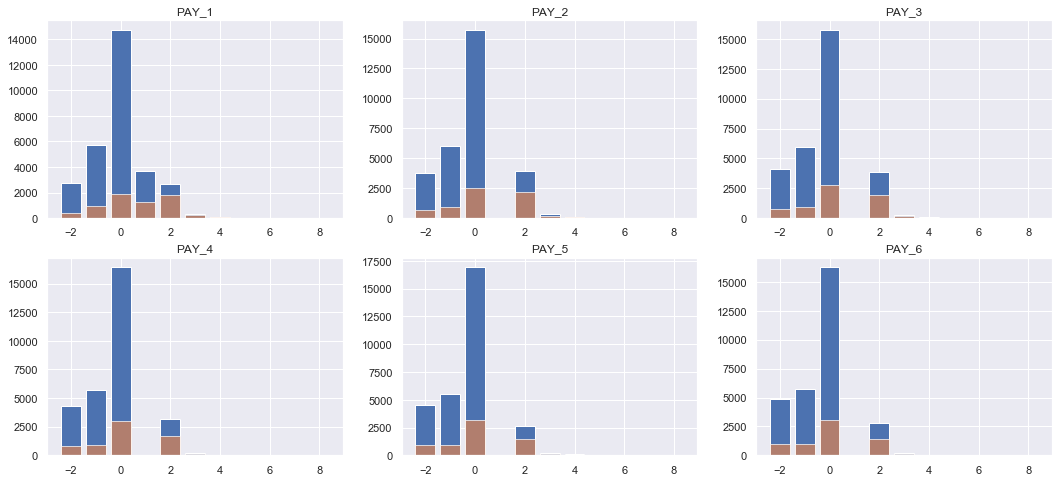

In [160]:
#-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay
#for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight
#months; 9 = payment delay for nine months and above.

# Comportamiento PAY_1 - PAY_6
pay_status = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status)):
    row,col = int(i/3), i%3

    d  = credit[pay_status[i]].value_counts()
    x = credit[pay_status[i]][(credit['default_payment_next_month']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center')
    ax[row,col].bar(x.index, x, align='center', alpha=0.7)
    ax[row,col].set_title(pay_status[i])

    
plt.show()

Text(0.5, 1.0, "Distribución por edad'")

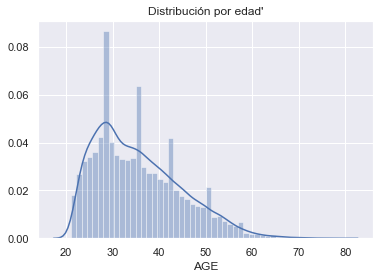

In [27]:
AGE = credit['AGE'].dropna()

age_dist = sns.distplot(AGE)
age_dist.set_title("Distribución por edad'")

Text(0.5, 1.0, "Distribución por edad'")

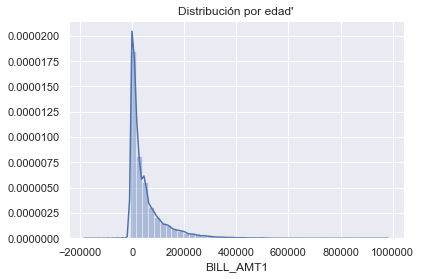

In [28]:
BILL_AMT1 = credit['BILL_AMT1'].dropna()

age_dist = sns.distplot(BILL_AMT1)
age_dist.set_title("Distribución por edad'")

<h3 style="color:Gray;">LIMIT_BAL</h3>

Text(0.5, 1.0, "Distribución por LIMIT_BAL'")

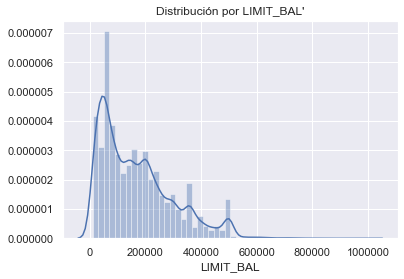

In [50]:
#Limit bal
LIMIT_BAL = credit['LIMIT_BAL'].dropna()

age_dist = sns.distplot(LIMIT_BAL)
age_dist.set_title("Distribución por LIMIT_BAL'")

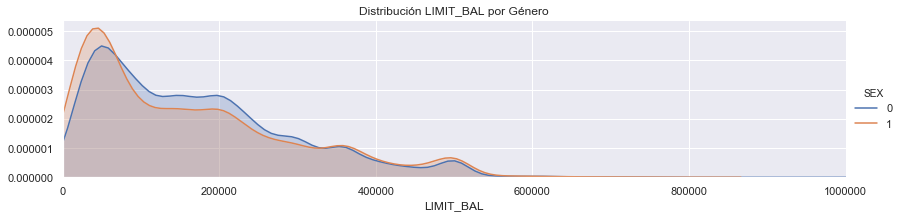

In [65]:
#1=male, 2=female
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribución LIMIT_BAL por Género')
fig.add_legend()

In [64]:
#1= male 2= female
#0= not default 1= default
credit.pivot_table('LIMIT_BAL', 'SEX','default_payment_next_month', aggfunc=np.sum, margins=True)

default_payment_next_month,0,1,All
SEX,,,
0,2578896000,501710000,3080606000
1,1582226000,361697680,1943923680
All,4161122000,863407680,5024529680


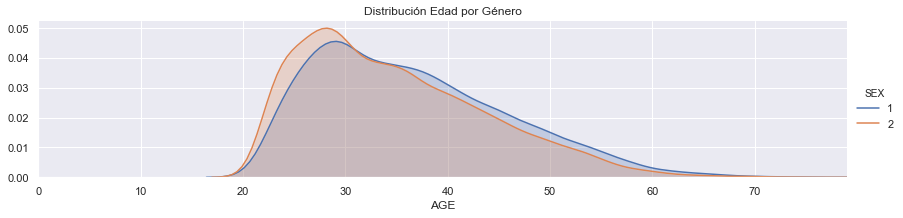

In [29]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribución Edad por Género')
fig.add_legend()

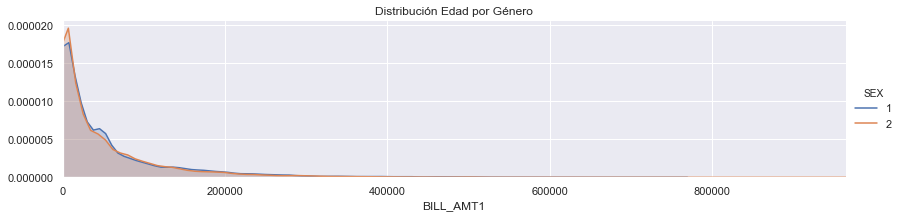

In [30]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'BILL_AMT1', shade=True)
oldest = credit['BILL_AMT1'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribución Edad por Género')
fig.add_legend()

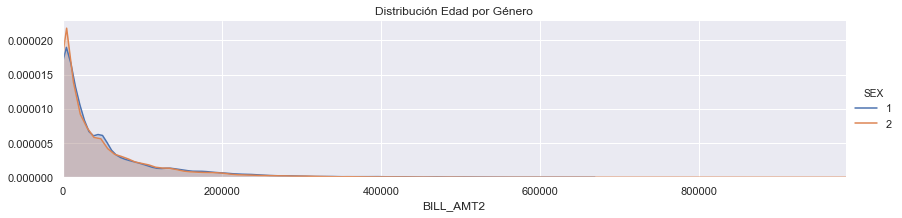

In [31]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'BILL_AMT2', shade=True)
oldest = credit['BILL_AMT2'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribución Edad por Género')
fig.add_legend()

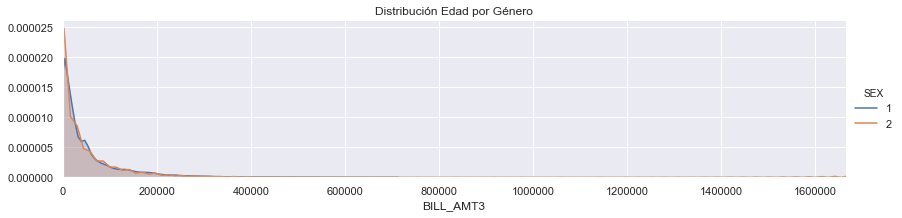

In [32]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'BILL_AMT3', shade=True)
oldest = credit['BILL_AMT3'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribución Edad por Género')
fig.add_legend()

In [34]:
male_default= credit['SEX'][(credit['SEX']==0)&(credit['default_payment_next_month']==1)].count()
male_default0 = credit['SEX'][(credit['SEX']==0)&(credit['default_payment_next_month']==0)].count()
print(male_default)
print(male_default0)

female_default= credit['SEX'][(credit['SEX']==1)&(credit['default_payment_next_month']==1)].count()
female_default0 = credit['SEX'][(credit['SEX']==1)&(credit['default_payment_next_month']==0)].count()
print(female_default)
print(female_default0)

cplotSex = credit['SEX'].value_counts()
print (cplotSex)



0
0
2873
9015
2    18112
1    11888
Name: SEX, dtype: int64


In [35]:
print(credit['SEX'])

0        2
1        2
2        2
3        2
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: int64


In [37]:
data = credit.drop('default_payment_next_month',axis=1)
print(data)
credit['SEX'] =  [ 0 if x==1 else 1 for x in data['SEX']]
data['SEX']= credit['SEX']


male= credit['SEX'][data['SEX']==0].count()
print(male)
male_default = credit['SEX'][(credit['SEX']==0)&(credit['default_payment_next_month']==1)].count()
print(male_default)

female=credit['SEX'][data['SEX']==1].count()
print(female)
female_default = credit['SEX'][(credit['SEX']==1)&(credit['default_payment_next_month']==1)].count()
print(female_default)



          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5 

In [55]:
data = credit.drop('default_payment_next_month',axis=1)
#print(data)
credit['SEX'] =  [ 0 if x==1 else 1 for x in data['SEX']]
data['SEX']= credit['SEX']

print(data['SEX'])
print(credit['SEX'])

0        0
1        0
2        0
3        0
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: int64
0        0
1        0
2        0
3        0
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: int64


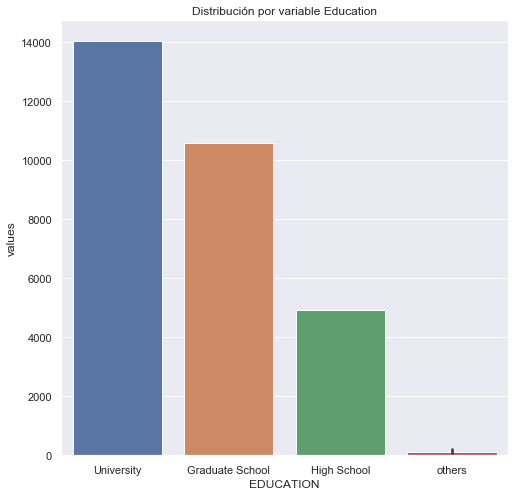

1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others
Distribución en cantidad
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
Distribución en porcentaje
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64


EDUCATION,0,1,2,3,4,5,6,All
default_payment_next_month,,,,,,,,
0,14.0,8549.0,10700.0,3680.0,116.0,262.0,43.0,23364
1,NaN,2036.0,3330.0,1237.0,7.0,18.0,8.0,6636
All,14.0,10585.0,14030.0,4917.0,123.0,280.0,51.0,30000


In [14]:
#Gráfico distribución EDUCATION
#1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others

qEducation = credit['EDUCATION'].value_counts()
#plotEducation = pd.DataFrame({'EDUCATION': qEducation.index,'values': qEducation.values})
plotEducation = pd.DataFrame({'EDUCATION': ['University', 'Graduate School', 'High School', 'others','others','others','others'],'values': qEducation.values})
plt.figure(figsize = (8,8))
plt.title('Distribución por variable Education')
sns.barplot(x = 'EDUCATION', y='values', data=plotEducation)
plt.show()

#count_row = credit.shape[0]
#print(count_row)
cplotEducation = credit['EDUCATION'].value_counts()
print('1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others')
print('Distribución en cantidad')
print(cplotEducation)
print('Distribución en porcentaje')
cplotEducationPorcentage = credit['EDUCATION'].value_counts('1')*100
print(cplotEducationPorcentage)


credit.pivot_table( 'SEX','default_payment_next_month','EDUCATION', aggfunc=np.count_nonzero, margins=True)


In [57]:
credit['EDUCATION'] = credit['EDUCATION'].apply({6:0, 0:5}.get)
print(credit)


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    0        NaN         1   24      2      2     -1   
1          2     120000    0        NaN         2   26     -1      2      0   
2          3      90000    0        NaN         2   34      0      0      0   
3          4      50000    0        NaN         1   37      0      0      0   
4          5      50000    1        NaN         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1        NaN         1   39      0      0      0   
29996  29997     150000    1        NaN         2   43     -1     -1     -1   
29997  29998      30000    1        NaN         2   37      4      3      2   
29998  29999      80000    1        NaN         1   41      1     -1      0   
29999  30000      50000    1        NaN         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [58]:
ccredit = credit['EDUCATION'].value_counts()
print(ccredit)

0.0    51
5.0    14
Name: EDUCATION, dtype: int64


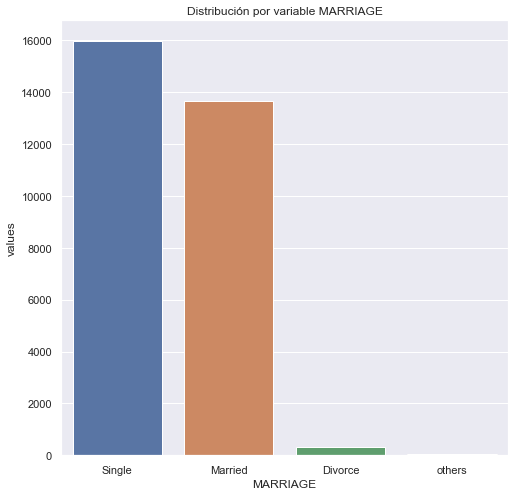

1 = married; 2 = single; 3 = divorce; 0=others
Distribución en cantidad
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
Distribución en porcentaje
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64


In [59]:
#Gráfico distribución MARRIAGE
#1 = married; 2 = single; 3 = divorce; 0=others

qMARRIAGE = credit['MARRIAGE'].value_counts()
#plotMARRIAGE = pd.DataFrame({'MARRIAGE': qMARRIAGE.index,'values': qMARRIAGE.values})
plotMARRIAGE = pd.DataFrame({'MARRIAGE': ['Single', 'Married', 'Divorce', 'others'],'values': qMARRIAGE.values})
plt.figure(figsize = (8,8))
plt.title('Distribución por variable MARRIAGE')
sns.barplot(x = 'MARRIAGE', y='values', data=plotMARRIAGE)
plt.show()

#count_row = credit.shape[0]
#print(count_row)
cplotMARRIAGE = credit['MARRIAGE'].value_counts()
print('1 = married; 2 = single; 3 = divorce; 0=others')
print('Distribución en cantidad')
print(cplotMARRIAGE)
print('Distribución en porcentaje')
cplotMARRIAGEPorcentage = credit['MARRIAGE'].value_counts('1')*100
print(cplotMARRIAGEPorcentage)


In [ ]:
#Gráfico distribución AGE

qAGE = credit['AGE'].value_counts()
plotAGE = pd.DataFrame({'AGE': qAGE.index,'values': qAGE.values})
#plotAGE = pd.DataFrame({'AGE': ['Single', 'Married', 'Divorce', 'others'],'values': qAGE.values})
plt.figure(figsize = (15,15))
plt.title('Distribución por variable AGE')
sns.barplot(x = 'AGE', y='values', data=plotAGE)
plt.show()

#count_row = credit.shape[0]
#print(count_row)
cplotAGE = credit['AGE'].value_counts()
print('Distribución en cantidad')
print(cplotAGE)
print('Distribución en porcentaje')
cplotAGEPorcentage = credit['AGE'].value_counts('1')*100
print(cplotAGEPorcentage)




In [ ]:
#Gráfico distribución lIMIT_BAL

qLIMIT_BAL = credit['LIMIT_BAL'].value_counts()
plotLIMIT_BAL = pd.DataFrame({'LIMIT_BAL': qLIMIT_BAL.index,'values': qLIMIT_BAL.values})
plt.figure(figsize = (15,15))
plt.title('Distribución por variable LIMIT_BAL')
sns.barplot(x = 'LIMIT_BAL', y='values', data=plotLIMIT_BAL)
plt.show()

#count_row = credit.shape[0]
#print(count_row)
cplotlIMIT_BAL = credit['LIMIT_BAL'].value_counts()
print('Distribución en cantidad')
print(cplotlIMIT_BAL)
print('Distribución en porcentaje')
cplotlIMIT_BALPorcentage = credit['LIMIT_BAL'].value_counts('1')*100
print(cplotlIMIT_BALPorcentage)



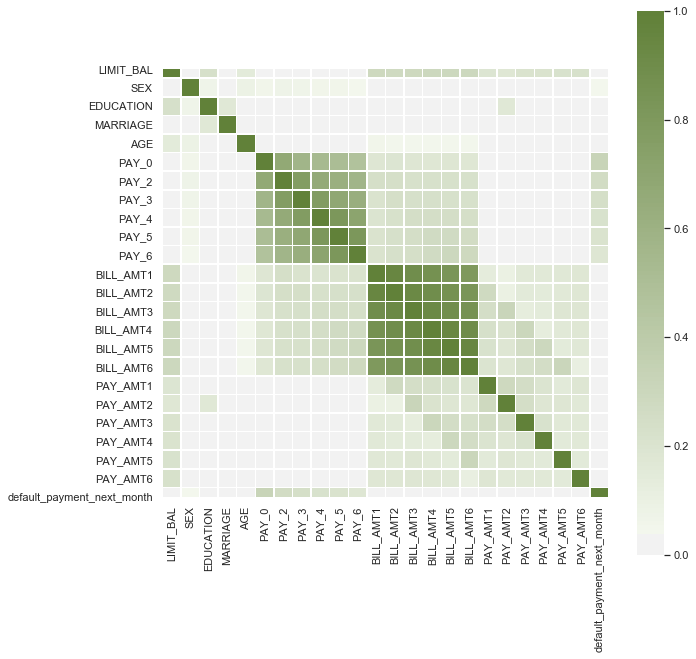

In [60]:
corr = credit.drop('ID',axis=1).corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(30, 110, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)

<h2 style="color:Gray;">------Fin Inspección y preparación de datos------</h2>

In [165]:
count_row = credit.shape[0]
count_row

30000

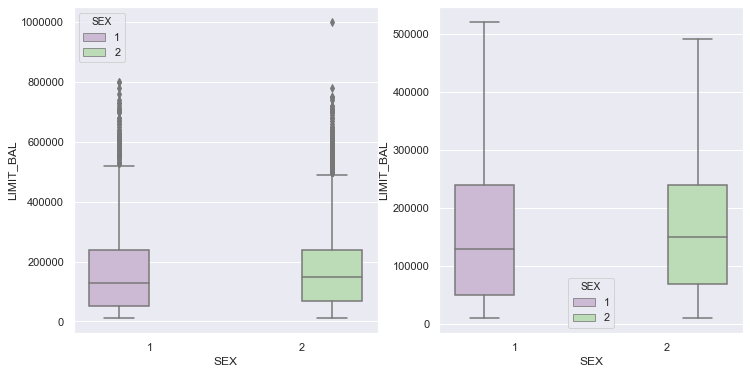

In [167]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit, palette="PRGn",showfliers=False)
plt.show();